# TOPIC: Amazon Stock Price Prediction
## Group 6
1. Anisha Rai (12190041)
2. Rashmi Gurung (12190072)
3. Sonam Dema (12190081)
4. Tashi Namgay (12190086)

# Table of Contents 
<ol start="0">
<li> Data Describtion </li>
<li> Importing Libraries </li>
<li> Loading Data</li>
<li> Data Summary</li>
<li> Data Cleaning</li>
<li> EDA and Visualization </li>
<li> Handeling Outliers</li>
<li> Scaling Numerical Features  </li>
<li> Train, Predict and Evaluate </li>
<li> Visualizing the Accuracy and Errors of different models used</li>
<li> Conclusion</li>
</ol>

# 0. Data Describtion
The data contains the attributes such as open, high, low, close, adjusted close price and volume of Amazon stock for each day from year 1997 till 2021 (24 years worth of data).
<ol start="1">
<li> Data: The date of the stock exchange </li>
<li> Open: The open is the starting period of trading on a securities exchange or organized over-the-counter market. </li>
<li> High:The high is the highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to the opening price.</li>
<li> Low: The low is typically lower than the opening or closing price, as it is unusual that the lowest price of the day would happen to occur at those particular moments.</li>
<li> Close: The close is the closing price generally refers to the last price at which a stock trades during a regular trading session.  </li>
<li> Adj Close: The adjusted close is the adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. This is different from close price.  </li>
<li> Volume: The volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy.</li>
</ol>

# 1. Importing Libraries

In [1361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=8,5
from sklearn.preprocessing import MinMaxScaler

# 2. Loading Data 

In [1362]:
df = pd.read_csv('/content/AmazonStockPrice.csv') #,index_col= "Date"
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/15/1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,5/16/1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,5/19/1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,5/20/1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,5/21/1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


# 3. Data Summary

In [1363]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [1364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [1365]:
df.shape

(6155, 7)

In [1366]:
df.count()

Date         6155
Open         6155
High         6155
Low          6155
Close        6155
Adj Close    6155
Volume       6155
dtype: int64

# 4. Data Cleaning

In [1367]:
# Handeling maiing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The data contains no null/missing values

In [1368]:
# Dropping the duplicate values if present
df.duplicated().sum()

0

The data contains no redundant rows 

In [1369]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [1370]:
# df.index = pd.to_datetime(df.index)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [1371]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# 5. EDA and Visualization

In [1372]:
df['Year'] = df['Date'].dt.year

In [1373]:
yeardf =df.groupby('Year', sort=True)
print(yeardf)

In [1374]:
# Mean, maximum and minimum closing price in each year
Close_result = df.groupby('Year').agg({'Close': ['mean', 'min', 'max']})
Close_result

Close                          
             mean          min          max
Year                                       
1997     3.126400     1.395833     5.390625
1998    15.661112     4.260417    58.656250
1999    69.062314    42.750000   106.687500
2000    46.533668    15.187500    89.375000
2001    12.200426     5.970000    21.875000
2002    16.484127     9.130000    24.250000
2003    37.741389    19.570000    59.910000
2004    43.565238    33.830002    57.180000
2005    39.897103    31.719999    49.500000
2006    35.909323    26.070000    47.869999
2007    67.229482    36.430000   100.820000
2008    69.880040    35.029999    96.250000
2009    87.281825    48.439999   142.250000
2010   139.140397   108.610001   184.759995
2011   196.672024   160.970001   246.710007
2012   220.303640   175.929993   261.679993
2013   298.031588   248.229996   404.390015
2014   332.551033   287.059998   407.049988
2015   478.138295   286.950012   693.969971
2016   699.523135   482.070007   844.359985
2017   968.167012   753.669983  1195.829956
2018  1641.726176  1189.010010  2039.510010
2019  1789.189206  1500.280029  2020.989990
2020  2680.855096  1676.609985  3531.449951
2021  3317.824632  2951.949951  3731.409912

In [1375]:
# Mean, maximum and minimum highest stock price in each year
high_result = df.groupby('Year').agg({'High': ['mean', 'min', 'max']})
high_result

High                          
             mean          min          max
Year                                       
1997     3.229948     1.447917     5.500000
1998    16.233197     4.385417    60.312500
1999    72.032759    45.750000   113.000000
2000    48.525980    16.546875    91.500000
2001    12.748528     6.100000    22.375000
2002    16.918095     9.850000    25.000000
2003    38.301310    19.680000    61.150002
2004    44.333770    34.259998    57.820000
2005    40.381389    31.740000    50.000000
2006    36.415378    26.299999    48.580002
2007    68.156534    37.070000   101.089996
2008    71.766996    39.000000    97.430000
2009    88.578770    50.099998   145.910004
2010   140.909286   111.290001   185.649994
2011   199.474881   163.539993   246.710007
2012   222.679440   178.250000   264.109985
2013   300.925991   252.929993   405.630005
2014   336.317540   290.420013   408.059998
2015   483.196231   290.790009   696.440002
2016   705.804959   493.500000   847.210022
2017   974.518766   758.760010  1213.410034
2018  1662.839839  1190.000000  2050.500000
2019  1802.590081  1538.000000  2035.800049
2020  2716.941377  1759.449951  3552.250000
2021  3349.971590  3009.000000  3773.080078

In [1376]:
# Mean, maximum and minimum lowest stock price in each year
low_result = df.groupby('Year').agg({'Low': ['mean', 'min', 'max']})
low_result

Low                          
             mean          min          max
Year                                       
1997     3.008626     1.312500     5.041667
1998    14.998150     4.145833    54.750000
1999    66.351904    41.000000   104.437500
2000    44.617560    14.875000    81.750000
2001    11.716255     5.510000    19.000000
2002    16.011746     9.030000    24.000000
2003    37.000317    18.549999    59.009998
2004    42.836230    33.000000    56.619999
2005    39.388175    30.600000    49.209999
2006    35.363426    25.760000    47.320000
2007    66.110159    36.299999    94.750000
2008    68.037075    34.680000    94.699997
2009    85.686230    47.630001   140.770004
2010   136.996627   105.800003   184.110001
2011   193.548373   160.589996   240.669998
2012   217.588840   172.000000   259.769989
2013   294.656506   245.750000   399.200012
2014   328.545436   284.000000   402.000000
2015   472.882143   285.250000   686.380005
2016   692.646230   474.000000   840.599976
2017   960.734065   747.700012  1191.150024
2018  1619.840519  1170.510010  2013.000000
2019  1773.117302  1460.930054  2003.869995
2020  2642.261857  1626.030029  3486.689941
2021  3286.924799  2881.000000  3696.790039

In [1377]:
# Mean, maximum and minimum opening price in each year
low_result = df.groupby('Year').agg({'Open': ['mean', 'min', 'max']})
low_result

Open                          
             mean          min          max
Year                                       
1997     3.114486     1.406250     5.364583
1998    15.550967     4.166667    58.333332
1999    69.408720    42.687500   111.937500
2000    46.602307    15.312500    85.375000
2001    12.264262     5.910000    21.687500
2002    16.406349     9.600000    24.150000
2003    37.606905    19.190001    60.389999
2004    43.557500    33.630001    57.099998
2005    39.820397    30.840000    49.500000
2006    35.872231    26.090000    47.970001
2007    67.114821    36.509998    96.589996
2008    69.839051    35.290001    96.059998
2009    87.071270    48.560001   143.619995
2010   138.958373   105.930000   185.000000
2011   196.669682   161.190002   244.289993
2012   220.011040   173.809998   261.739990
2013   297.875119   248.940002   404.649994
2014   332.798452   284.399994   408.000000
2015   478.124961   286.279999   691.890015
2016   699.756587   478.010010   845.789978
2017   968.275619   757.919983  1204.880005
2018  1644.072709  1172.000000  2038.109985
2019  1788.746190  1465.199951  2025.619995
2020  2681.004191  1641.510010  3547.000000
2021  3319.577542  3005.000000  3744.000000

Text(0.5, 1.0, 'Change in Closing Price with respect to Opening Price')

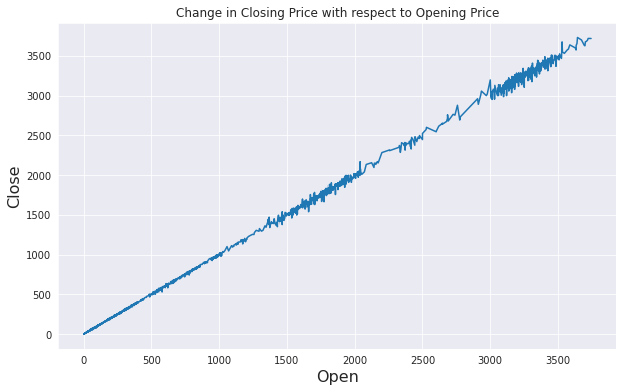

In [1378]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Open", y="Close",data=df)
plt.title("Change in Closing Price with respect to Opening Price")

In [1379]:
# df['Year'] = df['Date'].dt.year

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 <a list of 7 Text major ticklabel objects>)

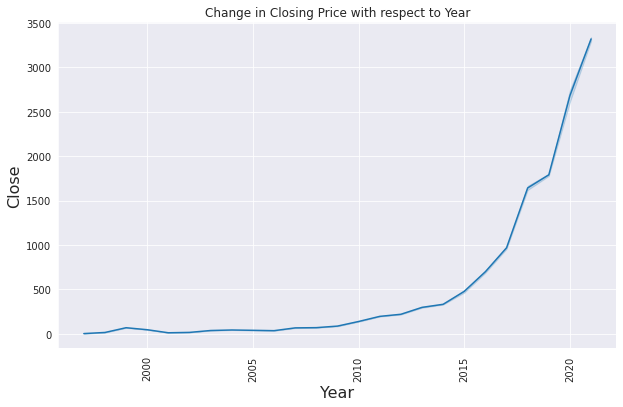

In [1380]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Close",data=df)
plt.title("Change in Closing Price with respect to Year")
plt.xticks(rotation = '90')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text major ticklabel objects>)

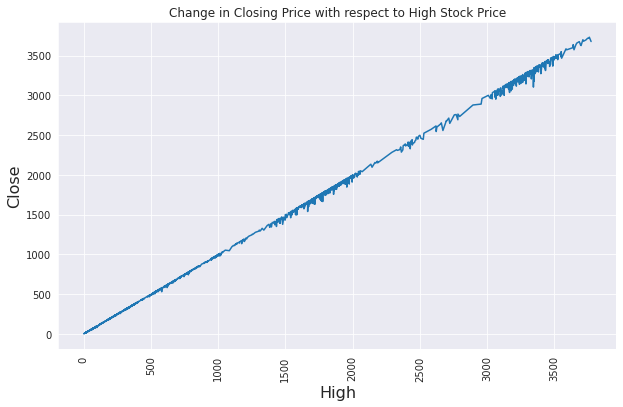

In [1381]:
plt.figure(figsize=(10,6))
sns.lineplot(x="High", y="Close",data=df)
plt.title("Change in Closing Price with respect to High Stock Price")
plt.xticks(rotation = '90')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text major ticklabel objects>)

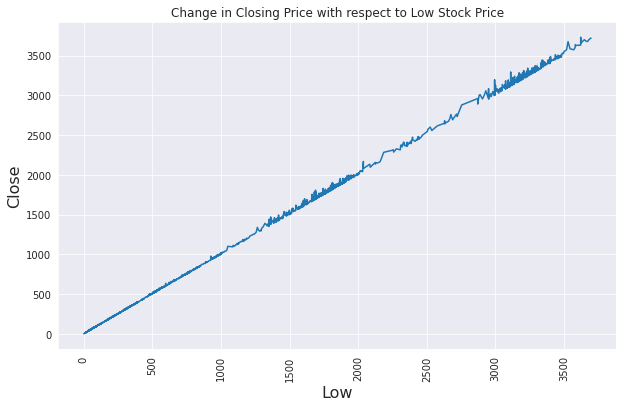

In [1382]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Low", y="Close",data=df)
plt.title("Change in Closing Price with respect to Low Stock Price")
plt.xticks(rotation = '90')

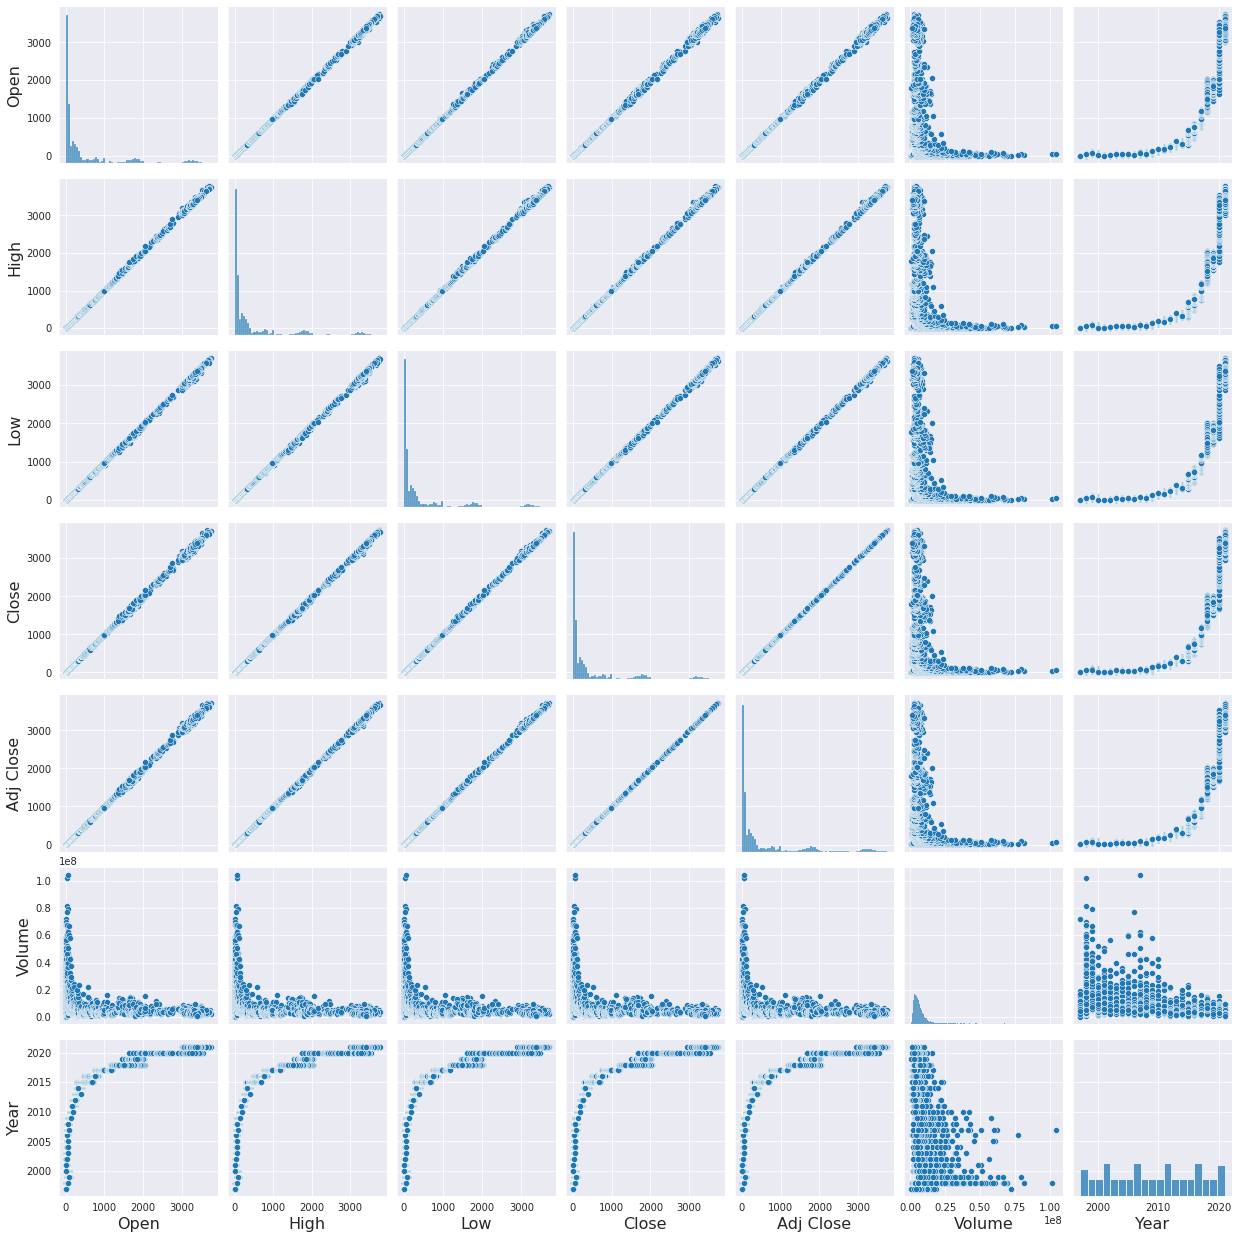

In [1383]:
 sns.pairplot(df)
 plt.show()

# 6. Handeling Outliers

In [1384]:
df.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)

In [1385]:
# Checking the Skewness of the each parameters before detecting the outliers

df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Open         2.110187
High         2.111021
Low          2.108895
Close        2.108968
Adj_Close    2.108968
Volume       4.552235
Year        -0.002210
dtype: float64

In [1386]:
df.Open=np.sqrt(df.Open)
df.High=np.sqrt(df.High)
df.Low=np.sqrt(df.Low)
df.Close=np.sqrt(df.Close)
df.Adj_Close=np.sqrt(df.Adj_Close)

In [1387]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Open         1.329247
High         1.331550
Low          1.326951
Close        1.328789
Adj_Close    1.328789
Volume       4.552235
Year        -0.002210
dtype: float64

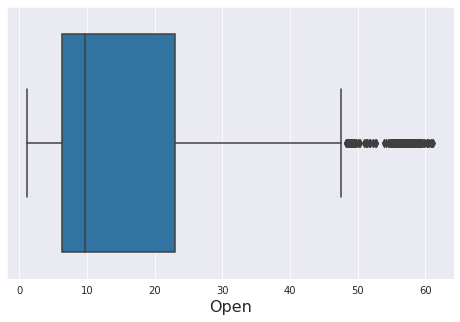

In [1388]:
sns.boxplot(x = df['Open'])
plt.show()

In [1389]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = df.Open.quantile(0.25)
q3 = df.Open.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1390]:
df[(df.Open < ll)  | (df.Open > ul)]

,Date,Open,High,Low,Close,Adj_Close,Volume,Year
5767,2020-04-16,48.435524,49.608467,48.321838,49.073312,49.073312,12038200,2020
5768,2020-04-17,48.706571,48.989795,48.125046,48.733972,48.733972,7930000,2020
5769,2020-04-20,48.887114,49.446739,48.847211,48.924535,48.924535,5770700,2020
5770,2020-04-21,49.159029,49.277886,47.745784,48.250597,48.250597,7476700,2020
5771,2020-04-22,48.672374,48.928519,48.487112,48.615738,48.615738,4212200,2020
...,...,...,...,...,...,...,...,...
6150,2021-10-21,58.431584,58.653900,58.335238,58.608958,58.608958,1881400,2021
6151,2021-10-22,58.489315,58.564837,57.717415,57.754221,57.754221,3133800,2021
6152,2021-10-25,57.749459,57.860177,57.425604,57.622653,57.622653,2226000,2021
6153,2021-10-26,57.874951,58.447584,57.827156,58.103959,58.103959,2693700,2021


In [1391]:
df1 = df[(df.Open > ll) & (df.Open < ul)]
df1.shape

(5768, 8)

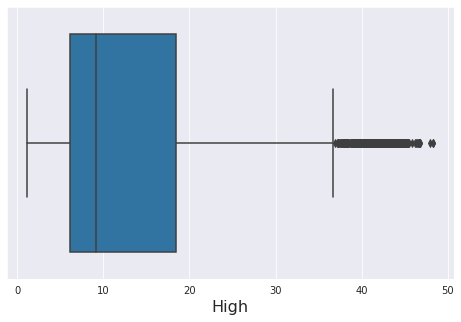

In [1392]:
sns.boxplot(x = df1['High'])
plt.show()

In [1393]:
q1 = df1.High.quantile(0.25)
q3 = df1.High.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1394]:
df1[(df1.High < ll)  | (df1.High > ul)]

,Date,Open,High,Low,Close,Adj_Close,Volume,Year
5206,2018-01-23,36.579912,36.944553,36.569659,36.912600,36.912600,5169300,2018
5207,2018-01-24,37.078565,37.258020,36.578682,36.844403,36.844403,6807500,2018
5208,2018-01-25,36.986484,37.126001,36.845895,37.120748,37.120748,4753000,2018
5209,2018-01-26,37.309650,37.450368,37.160598,37.443959,37.443959,4857300,2018
5210,2018-01-29,37.539047,37.833715,37.422452,37.652092,37.652092,5701900,2018
...,...,...,...,...,...,...,...,...
5763,2020-04-09,45.213936,45.310043,44.918371,45.196903,45.196903,4646500,2020
5764,2020-04-13,45.166359,46.690470,45.144213,46.571130,46.571130,6716700,2020
5765,2020-04-14,46.909167,47.874837,46.756924,47.784098,47.784098,8087200,2020
5766,2020-04-15,47.515050,48.304970,47.381431,48.038317,48.038317,6866600,2020


In [1395]:
df2 = df1[(df1.High > ll) & (df1.High < ul)]
df2.shape

(5206, 8)

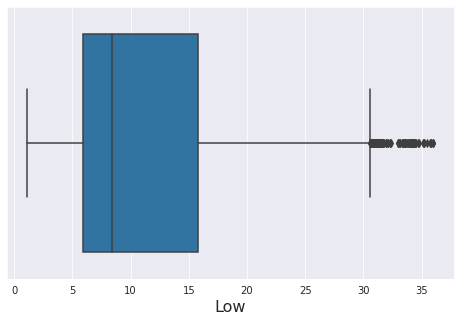

In [1396]:
sns.boxplot(x = df2['Low'])
plt.show()

In [1397]:
q1 = df2.Low.quantile(0.25)
q3 = df2.Low.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1398]:
df2[(df2.Low < ll)  | (df2.Low > ul)]

,Date,Open,High,Low,Close,Adj_Close,Volume,Year
5023,2017-05-02,30.767678,30.823692,30.682405,30.772390,30.772390,3848800,2017
5024,2017-05-03,30.757113,30.757113,30.592483,30.676213,30.676213,3582700,2017
5027,2017-05-08,30.674909,30.806655,30.646534,30.806492,30.806492,3415700,2017
5028,2017-05-09,30.867458,30.949798,30.825314,30.867783,30.867783,3262100,2017
5029,2017-05-10,30.878795,30.882843,30.740852,30.805032,30.805032,2096500,2017
...,...,...,...,...,...,...,...,...
5201,2018-01-16,36.373067,36.605190,35.948575,36.122846,36.122846,7220700,2018
5202,2018-01-17,36.224853,36.249138,35.789384,35.986108,35.986108,5253800,2018
5203,2018-01-18,35.971516,36.119247,35.833225,35.962758,35.962758,4026900,2018
5204,2018-01-19,36.221541,36.235342,35.958170,35.980272,35.980272,4578500,2018


In [1399]:
df3 = df2[(df2.Low > ll) & (df2.Low < ul)]
df3.shape

(5028, 8)

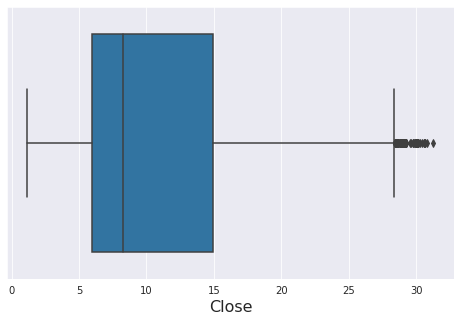

In [1400]:
sns.boxplot(x = df3['Close'])
plt.show()

In [1401]:
q1 = df3.Close.quantile(0.25)
q3 = df3.Close.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1402]:
df3[(df3.Low < ll)  | (df3.Low > ul)]

,Date,Open,High,Low,Close,Adj_Close,Volume,Year
4875,2016-09-28,28.600699,28.812150,28.583737,28.787497,28.787497,4422100,2016
4876,2016-09-29,28.779507,28.939592,28.716372,28.793228,28.793228,4922200,2016
4877,2016-09-30,28.854982,28.981891,28.851344,28.936309,28.936309,4430600,2016
4878,2016-10-03,28.913665,28.980338,28.831406,28.926458,28.926458,2769400,2016
4879,2016-10-04,28.998448,29.023611,28.814233,28.879578,28.879578,2950300,2016
...,...,...,...,...,...,...,...,...
5025,2017-05-04,30.736786,30.740852,30.565012,30.619112,30.619112,2418400,2017
5026,2017-05-05,30.667899,30.672300,30.500819,30.563868,30.563868,2866400,2017
5050,2017-06-09,31.819805,31.827504,30.446675,31.277947,31.277947,7647700,2017
5124,2017-09-25,30.810875,30.812659,30.543248,30.655994,30.655994,5124000,2017


In [1403]:
df4 = df3[(df3.Low > ll) & (df3.Low < ul)]
df4.shape

(4933, 8)

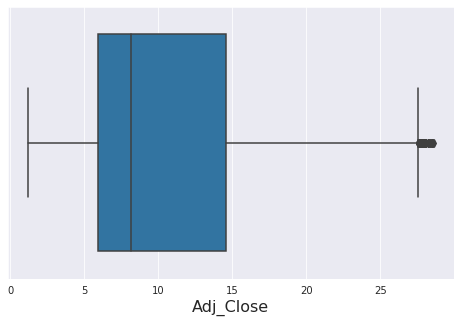

In [1404]:
sns.boxplot(x = df4['Adj_Close'])
plt.show()

In [1405]:
q1 = df4.Adj_Close.quantile(0.25)
q3 = df4.Adj_Close.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [1406]:
df5 = df4[(df4.Adj_Close > ll) & (df4.Adj_Close < ul)]
df5.shape

(4850, 8)

In [1407]:
# Checking the Skewness of the each parameters again 
df5.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Open         0.942589
High         0.939444
Low          0.944176
Close        0.941446
Adj_Close    0.941446
Volume       4.198805
Year        -0.000531
dtype: float64

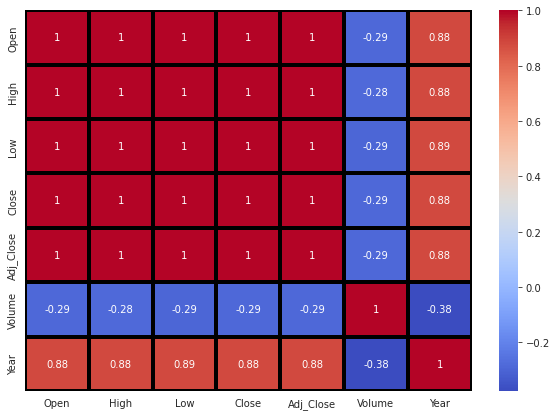

In [1408]:
#Correlation Matrix
corrMatrix = df5.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

The target parameter, Close is highly corelated with all of the other parameters. Therefore, we will be taking all the parameters for training except the voulme.

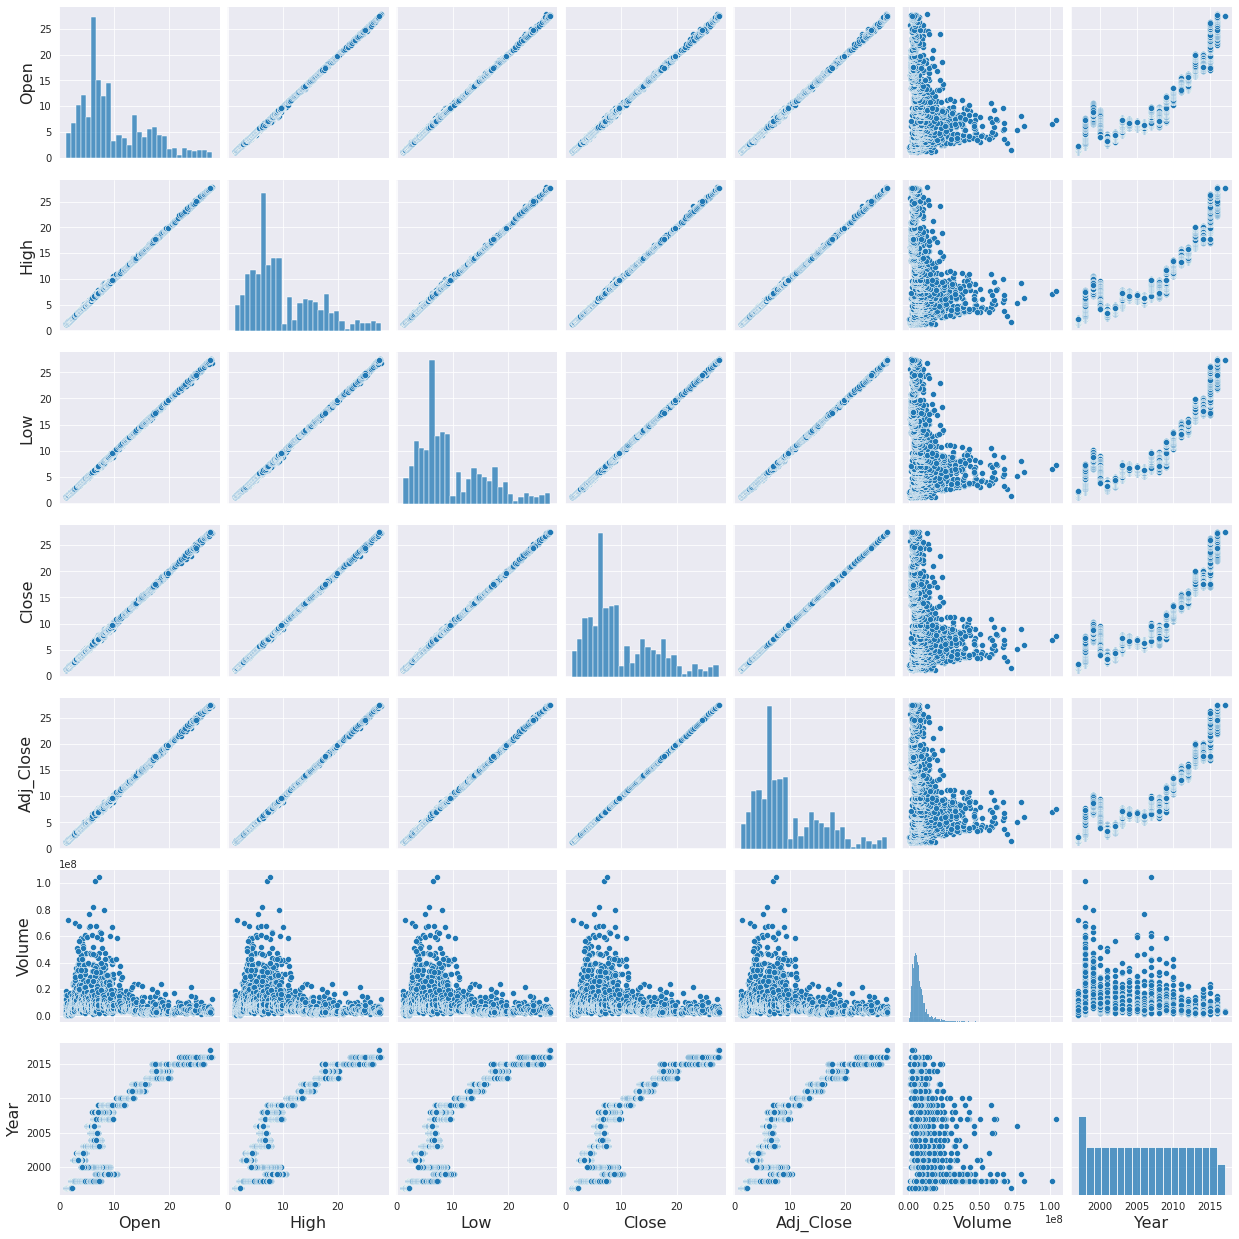

In [1409]:
 sns.pairplot(df5)
 plt.show()

# 7. Scaling the numeric data

In [1410]:
 df5.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
Year                  int64
dtype: object

In [1411]:
numeric_columns = ['Open','High','Low','Close','Adj_Close']
numericdf = df5[numeric_columns]

In [1412]:
numericdf.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
dtype: int64

In [1413]:
#Dataframe before scaling
numericdf.head()

,Open,High,Low,Close,Adj_Close
0,1.561249,1.581139,1.388194,1.399405,1.399405
1,1.403122,1.406829,1.307032,1.314978,1.314978
2,1.326807,1.330726,1.274755,1.307032,1.307032
3,1.314978,1.322876,1.278834,1.278834,1.278834
4,1.278834,1.282900,1.172604,1.194606,1.194606


In [1414]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [1415]:
# dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

,Open,High,Low,Close,Adj_Close
0,0.014049,0.014149,0.009199,0.008273,0.008273
1,0.008131,0.007622,0.006121,0.005068,0.005068
2,0.005275,0.004772,0.004897,0.004766,0.004766
3,0.004832,0.004478,0.005052,0.003696,0.003696
4,0.003480,0.002981,0.001023,0.000499,0.000499


# 8. Train, Predict and Evaluate

In [1416]:
# Input:
X = transformdf[['Open','High','Low']] # Adj_Close is not taken because it causes overfitting

# Output:
y = transformdf['Close']

In [1417]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# 8.1: Linear Regression Algorithm

In [1418]:
# TRAINING 

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [1419]:
# PREDICTION
y_pred_LR = LR_model.predict(X_test)
#y_pred_LR

In [1420]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

LR_MAE = metrics.mean_absolute_error(y_test, y_pred_LR)
LR_MSE = metrics.mean_squared_error(y_test, y_pred_LR)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
print('Mean Absolute Error:', LR_MAE)
print('MSE: ', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)


Mean Absolute Error: 0.0014623104808258469
MSE:  4.464903050987041e-06
Root Mean Squared Error: 0.0021130317202983587


In [1421]:
LR_model.intercept_

-0.0005817783225317563

In [1422]:
LR_model.coef_

array([-0.60489539,  0.8095518 ,  0.79879073])

In [1423]:
# REGRESSION MODEL EVALUTION

Y_train_predicted_LR = LR_model.predict(X_train)
Y_test_predicted_LR = LR_model.predict(X_test)
LR_train_accuracy = r2_score(y_train,Y_train_predicted_LR)
LR_test_accuracy = r2_score(y_test,Y_test_predicted_LR)  
print("Train set accuracy of regression model: ",LR_train_accuracy)
print("Test set accuracy of regression model: ",LR_test_accuracy)                           

Train set accuracy of regression model:  0.9999230821174364
Test set accuracy of regression model:  0.9999175950345379


In [1424]:
# REGRESSION MODEL VALIDATIONG with sample input
import numpy as np

y = np.array([0.014049,0.014149,0.009199])
np = y.reshape(-1,3)
LR_model.predict(np)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.00972247])

In [1425]:
LR_Result = pd.DataFrame({"Actual Closing Price":y_test,"Predicted Closing Price":Y_test_predicted_LR,"Difference":(y_test-Y_test_predicted_LR)})
LR_Result.head()

,Actual Closing Price,Predicted Closing Price,Difference
2988,0.280563,0.280888,-0.000325
1658,0.216972,0.217083,-0.000111
2873,0.220090,0.222873,-0.002784
3879,0.548318,0.548435,-0.000117
2469,0.191615,0.191492,0.000123


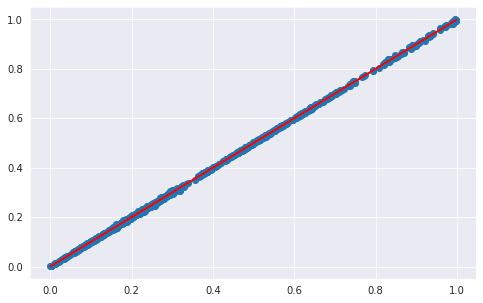

In [1426]:
plt.scatter(LR_Result['Actual Closing Price'],LR_Result['Predicted Closing Price'])
plt.plot(y_test,y_test,'r')

# 8.2: Polynomial Regression

In [1427]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [1428]:
PR_model = LinearRegression()
PR_model.fit(X_train_poly,y_train)

LinearRegression()

In [1429]:
# PREDICTION
y_pred_PR = PR_model.predict(X_test_poly)
y_pred_PR

array([0.28106207, 0.21709932, 0.22202921, ..., 0.88606423, 0.23723909,
       0.18865332])

In [1430]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

PR_MAE = metrics.mean_absolute_error(y_test, y_pred_PR)
PR_MSE = metrics.mean_squared_error(y_test, y_pred_PR)
PR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_PR))
print('Mean Absolute Error:', PR_MAE)
print('MSE: ', PR_MSE)
print('Root Mean Squared Error:', PR_RMSE)

Mean Absolute Error: 0.0014720728521708042
MSE:  4.618127746929194e-06
Root Mean Squared Error: 0.002148982956407331


In [1456]:
# EVALUTION 

Y_train_predicted_PR = PR_model.predict(X_train_poly)
Y_test_predicted_PR = PR_model.predict(X_test_poly)
PR_train_accuracy = r2_score(y_train,Y_train_predicted_PR)
PR_test_accuracy = r2_score(y_test,Y_test_predicted_PR)
print("Train set accuracy of Polynomial model: ",PR_train_accuracy)
print("Test set accuracy of Polynomial model: ",PR_test_accuracy)

Train set accuracy of Polynomial model:  0.9999254202995703
Test set accuracy of Polynomial model:  0.999914767095021


In [1432]:
PR_Result = pd.DataFrame({"Actual Closing Price":y_test,"Predicted Closing Price":Y_test_predicted_PR, "Difference":(y_test - Y_test_predicted_PR)})
PR_Result.head()

,Actual Closing Price,Predicted Closing Price,Difference
2988,0.280563,0.281062,-0.000499
1658,0.216972,0.217099,-0.000128
2873,0.220090,0.222029,-0.001940
3879,0.548318,0.548620,-0.000302
2469,0.191615,0.191445,0.000170


# 8.3: RANDOM FOREST ALGORITHM

In [1433]:
# TRAINING 

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=200,min_samples_leaf=2)
RF_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=200)

In [1434]:
# PREDICTION
y_pred_RF = RF_model.predict(X_test)
y_pred_RF

array([0.28045322, 0.21937223, 0.22896075, ..., 0.88443451, 0.23742955,
       0.18959449])

In [1435]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

RF_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
RF_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Mean Absolute Error:', RF_MAE)
print('MSE: ', RF_MSE)
print('Root Mean Squared Error:', RF_RMSE)

Mean Absolute Error: 0.0018737546045390862
MSE:  7.631425017596736e-06
Root Mean Squared Error: 0.0027625033968479997


In [1436]:
# EVALUTION 

Y_train_predicted_RF = RF_model.predict(X_train)
Y_test_predicted_RF = RF_model.predict(X_test)
RF_train_accuracy = r2_score(y_train,Y_train_predicted_RF)
RF_test_accuracy = r2_score(y_test,Y_test_predicted_RF)
print("Train set accuracy of RandomForest model: ",RF_train_accuracy)
print("Test set accuracy of RandomForest model: ",RF_test_accuracy)

Train set accuracy of RandomForest model:  0.9999679527943631
Test set accuracy of RandomForest model:  0.9998591531982173


In [1437]:
# RANDOM FOREST MODEL VALIDATIONG with sample input
import numpy as np

y2 = np.array([0.014049,0.014149,0.009199])
np = y2.reshape(-1,3)
RF_model.predict(np)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([0.01298001])

In [1438]:
RF_Result = pd.DataFrame({"Actual Closing Price":y_test,"Predicted Closing Price":Y_test_predicted_RF, "Difference":(y_test - Y_test_predicted_RF)})
RF_Result.head()

,Actual Closing Price,Predicted Closing Price,Difference
2988,0.280563,0.280453,0.000110
1658,0.216972,0.219372,-0.002401
2873,0.220090,0.228961,-0.008871
3879,0.548318,0.551419,-0.003101
2469,0.191615,0.192015,-0.000400


# 8.4: DECISION TREE

In [1439]:
#TRAIN

from sklearn.tree import DecisionTreeRegressor

In [1440]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [1441]:
# PREDICT

y_pred_DT = DT_model.predict(X_test)
y_pred_DT

array([0.28793523, 0.21596733, 0.23945514, ..., 0.88506658, 0.23945514,
       0.19592976])

In [1442]:
import numpy as np

DT_MAE = metrics.mean_absolute_error(y_test, y_pred_DT)
DT_MSE = metrics.mean_squared_error(y_test, y_pred_DT)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
print('Mean Absolute Error:', DT_MAE)
print('MSE: ', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)

Mean Absolute Error: 0.007211312314191882
MSE:  7.838948266488135e-05
Root Mean Squared Error: 0.008853783522589727


In [1443]:
# EVALUTION 

Y_train_predicted_DT = DT_model.predict(X_train)
Y_test_predicted_DT = DT_model.predict(X_test)
DT_train_accuracy = r2_score(y_train,Y_train_predicted_DT)
DT_test_accuracy = r2_score(y_test,Y_test_predicted_DT)
print("Train set accuracy of DecisionTree model: ",DT_train_accuracy)
print("Test set accuracy of DecisionTree model: ",DT_test_accuracy)

Train set accuracy of DecisionTree model:  0.9986603714003078
Test set accuracy of DecisionTree model:  0.9985532311591493


In [1444]:
# RANDOM FOREST MODEL VALIDATIONG with sample input
import numpy as np

y3 = np.array([0.014049,0.014149,0.009199])
np = y3.reshape(-1,3)
DT_model.predict(np)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([0.01482338])

In [1445]:
DT_Result = pd.DataFrame({"Actual Closing Price":y_test,"Predicted Closing Price":Y_test_predicted_DT,"Difference":(y_test-Y_test_predicted_DT)})
DT_Result.head()

,Actual Closing Price,Predicted Closing Price,Difference
2988,0.280563,0.287935,-0.007372
1658,0.216972,0.215967,0.001004
2873,0.220090,0.239455,-0.019366
3879,0.548318,0.556039,-0.007720
2469,0.191615,0.195930,-0.004315


# 8.5: KNN ALGORITHM

In [1446]:
from sklearn.neighbors import KNeighborsRegressor

In [1447]:
KNN_model = KNeighborsRegressor(10)
KNN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [1448]:
# PREDICTION
y_pred_KNN = KNN_model.predict(X_test)
y_pred_KNN

array([0.28041481, 0.21899335, 0.23100742, ..., 0.87998009, 0.23617854,
       0.18932018])

In [1449]:
import numpy as np

KNN_MAE = metrics.mean_absolute_error(y_test, y_pred_KNN)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred_KNN)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN))
print('Mean Absolute Error:', KNN_MAE)
print('MSE: ', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)

Mean Absolute Error: 0.0019390036877566005
MSE:  7.502404817720276e-06
Root Mean Squared Error: 0.0027390518099737133


In [1450]:
# EVALUTION 

Y_train_predicted_KNN = KNN_model.predict(X_train)
Y_test_predicted_KNN = KNN_model.predict(X_test)
KNN_train_accuracy = r2_score(y_train,Y_train_predicted_KNN)
KNN_test_accuracy = r2_score(y_test,Y_test_predicted_KNN)
print("Train set accuracy of DecisionTree model: ",KNN_train_accuracy)
print("Test set accuracy of DecisionTree model: ",KNN_train_accuracy)

Train set accuracy of DecisionTree model:  0.9998860669954563
Test set accuracy of DecisionTree model:  0.9998860669954563


In [1451]:
# RANDOM FOREST MODEL VALIDATIONG with sample input
import numpy as np

y4 = np.array([0.014049,0.014149,0.009199])
np = y4.reshape(-1,3)
DT_model.predict(np)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([0.01482338])

In [1452]:
KNN_Result = pd.DataFrame({"Actual Closing Price":y_test,"Predicted Closing Price":Y_test_predicted_KNN,"Difference":(y_test-Y_test_predicted_KNN)})
KNN_Result.head()

,Actual Closing Price,Predicted Closing Price,Difference
2988,0.280563,0.280415,0.000148
1658,0.216972,0.218993,-0.002022
2873,0.220090,0.231007,-0.010918
3879,0.548318,0.550495,-0.002176
2469,0.191615,0.191269,0.000345


# 9. Visualizing the Accuracy and Errors of different models used

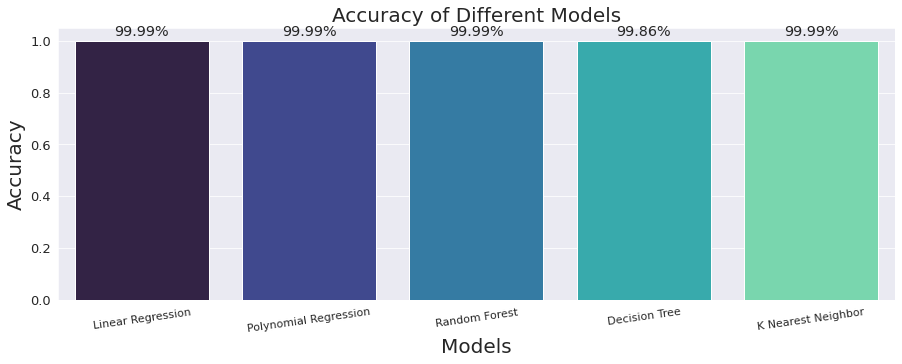

In [1453]:
mylist=[]
mylist2=[]
mylist.append(LR_test_accuracy)
mylist2.append("Linear Regression",)
mylist.append(PR_test_accuracy)
mylist2.append("Polynomial Regression",)
mylist.append(RF_test_accuracy)
mylist2.append("Random Forest")
mylist.append(DT_test_accuracy)
mylist2.append("Decision Tree")
mylist.append(KNN_test_accuracy)
mylist2.append("K Nearest Neighbor")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


In [1454]:
# ERRORS
data = {"Model": ["Linear Regression","Polynomial Regression", "Random Forest","Decision Tree", "K Nearest Neighbor"], 
        "MSE": [LR_MSE,PR_MSE, RF_MSE, DT_MSE, KNN_MSE],         
        "RMSE": [LR_RMSE,PR_RMSE, RF_RMSE, DT_RMSE, KNN_RMSE],
        "MAE": [LR_MAE, PR_MAE,RF_MAE, DT_MAE, KNN_MAE]}

results = pd.DataFrame(data=data)
results

,Model,MSE,RMSE,MAE
0,Linear Regression,0.000004,0.002113,0.001462
1,Polynomial Regression,0.000005,0.002149,0.001472
2,Random Forest,0.000008,0.002763,0.001874
3,Decision Tree,0.000078,0.008854,0.007211
4,K Nearest Neighbor,0.000008,0.002739,0.001939


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


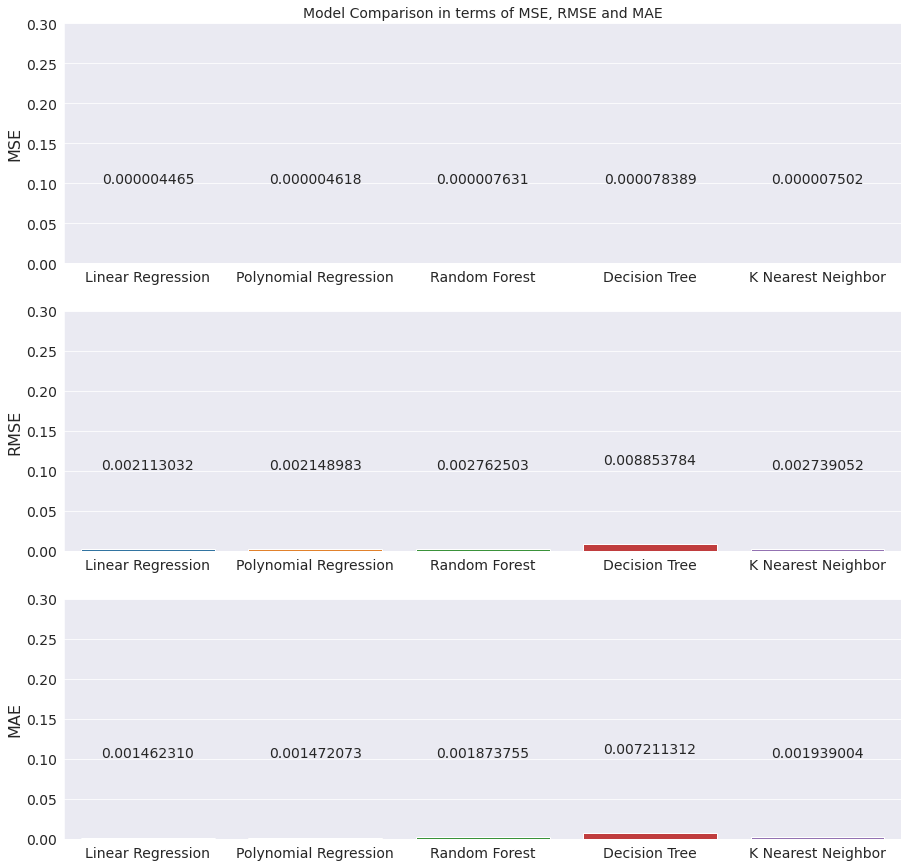

In [1455]:
# visualize the results(Errors) using bar charts

plt.rcParams["axes.labelsize"] = 16
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.title("Model Comparison in terms of MSE, RMSE and MAE", fontsize=14)
g1 = sns.barplot(x="Model", y="MSE", data=results)
plt.ylim(0, 0.3)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.9f}".format(height), ha="center", fontsize=14)
    plt.subplot(3, 1, 2)
g2 = sns.barplot(x  ="Model", y ="RMSE", data=results)
plt.ylim(0,0.3)
g2.set_xlabel("")
g2.tick_params(labelsize=14)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.9f}".format(height), ha="center", fontsize=14) 

plt.subplot(3, 1, 3)
g3 = sns.barplot(x="Model", y="MAE", data=results)
plt.ylim(0,0.3)
g3.set_xlabel("")
g3.tick_params(labelsize=14)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.9f}".format(height), ha="center", fontsize=14) 

# 10. CONCLUSION: 
By looking at the Accuracy, MSE, MAE and RMSE; we can conclude that the Linear Regression Model gives the best results.

#THANK YOU